# Data Collection

In [11]:
import pandas as pd  

# Load the dataset

In [13]:
file_path = "enriched_sales_data_holidays (1).csv" 
df = pd.read_csv(file_path, encoding="ISO-8859-1")  

# Display the first few rows
print(df.head())

# Show dataset info
print(df.info())

# Check missing values
print(df.isnull().sum())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156  2016-11-08  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156  2016-11-08  11/11/2016    Second Class    CG-12520   
2       4  US-2015-108966  2015-10-11  10/18/2015  Standard Class    SO-20335   
3       6  CA-2014-115812  2014-06-09   6/14/2014  Standard Class    BH-11710   
4      11  CA-2014-115812  2014-06-09   6/14/2014  Standard Class    BH-11710   

     Customer Name   Segment        Country             City  ...  \
0      Claire Gute  Consumer  United States        Henderson  ...   
1      Claire Gute  Consumer  United States        Henderson  ...   
2   Sean O'Donnell  Consumer  United States  Fort Lauderdale  ...   
3  Brosina Hoffman  Consumer  United States      Los Angeles  ...   
4  Brosina Hoffman  Consumer  United States      Los Angeles  ...   

        Product ID   Category Sub-Category  \
0  FUR-BO-10001798  Furniture    Bookcases   
1  FUR

In [15]:
print(df.columns)  # columns names 

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'is_holiday',
       'holiday_name'],
      dtype='object')


# Data Preprocessing 

In [18]:
import pandas as pd

# One-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)  # drop_first=True avoids multicollinearity

print(df_encoded)



      Row ID  Postal Code      Sales  Quantity  Discount    Profit  \
0          1        42420   261.9600         2      0.00   41.9136   
1          2        42420   731.9400         3      0.00  219.5820   
2          4        33311   957.5775         5      0.45 -383.0310   
3          6        90032    48.8600         7      0.00   14.1694   
4         11        90032  1706.1840         9      0.20   85.3092   
...      ...          ...        ...       ...       ...       ...   
2116    9963        77041   383.4656         4      0.32  -67.6704   
2117    9965        19711    13.4000         1      0.00    6.4320   
2118    9981        70506    85.9800         1      0.00   22.3548   
2119    9990        33180    25.2480         3      0.20    4.1028   
2120    9991        92627    91.9600         2      0.00   15.6332   

      is_holiday  Order ID_CA-2014-100678  Order ID_CA-2014-100706  \
0          False                    False                    False   
1          False   

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns
numerical_cols = ['Sales', 'Quantity', 'Discount', 'Profit']  # Adjust based on your dataset

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.head())  # Check transformed values


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156  2016-11-08  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156  2016-11-08  11/11/2016    Second Class    CG-12520   
2       4  US-2015-108966  2015-10-11  10/18/2015  Standard Class    SO-20335   
3       6  CA-2014-115812  2014-06-09   6/14/2014  Standard Class    BH-11710   
4      11  CA-2014-115812  2014-06-09   6/14/2014  Standard Class    BH-11710   

     Customer Name   Segment        Country             City  ...  \
0      Claire Gute  Consumer  United States        Henderson  ...   
1      Claire Gute  Consumer  United States        Henderson  ...   
2   Sean O'Donnell  Consumer  United States  Fort Lauderdale  ...   
3  Brosina Hoffman  Consumer  United States      Los Angeles  ...   
4  Brosina Hoffman  Consumer  United States      Los Angeles  ...   

        Product ID   Category Sub-Category  \
0  FUR-BO-10001798  Furniture    Bookcases   
1  FUR

In [21]:
#Standardize Data (Z-Score Normalization) 
from sklearn.preprocessing import StandardScaler

# Apply Standardization
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.head())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156  2016-11-08  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156  2016-11-08  11/11/2016    Second Class    CG-12520   
2       4  US-2015-108966  2015-10-11  10/18/2015  Standard Class    SO-20335   
3       6  CA-2014-115812  2014-06-09   6/14/2014  Standard Class    BH-11710   
4      11  CA-2014-115812  2014-06-09   6/14/2014  Standard Class    BH-11710   

     Customer Name   Segment        Country             City  ...  \
0      Claire Gute  Consumer  United States        Henderson  ...   
1      Claire Gute  Consumer  United States        Henderson  ...   
2   Sean O'Donnell  Consumer  United States  Fort Lauderdale  ...   
3  Brosina Hoffman  Consumer  United States      Los Angeles  ...   
4  Brosina Hoffman  Consumer  United States      Los Angeles  ...   

        Product ID   Category Sub-Category  \
0  FUR-BO-10001798  Furniture    Bookcases   
1  FUR

In [22]:
#✅ Convert Numeric Columns
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')


In [26]:
#✅ Convert Date Columns
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [28]:
#✅ Convert Categorical Columns to Type 'category' 
df['Category'] = df['Category'].astype('category')
df['Ship Mode'] = df['Ship Mode'].astype('category')


# Data Exploration 

In [39]:
# Check for duplicate rows
print("Duplicate Rows:", df.duplicated().sum())

# Remove duplicate rows
df = df.drop_duplicates()

# Verify removal
print("Duplicate Rows After Removal:", df.duplicated().sum())


Duplicate Rows: 0
Duplicate Rows After Removal: 0


In [41]:
print(df.describe())  # Summary statistics


            Row ID                     Order Date  \
count  2121.000000                           2121   
mean   5041.643564  2016-04-30 03:54:13.748231680   
min       1.000000            2014-01-06 00:00:00   
25%    2568.000000            2015-05-26 00:00:00   
50%    5145.000000            2016-06-20 00:00:00   
75%    7534.000000            2017-05-14 00:00:00   
max    9991.000000            2017-12-30 00:00:00   
std    2885.740258                            NaN   

                           Ship Date   Postal Code         Sales  \
count                           2121   2121.000000  2.121000e+03   
mean   2016-05-04 01:54:44.299858432  55726.556341 -1.172513e-17   
min              2014-01-10 00:00:00   1040.000000 -6.916522e-01   
25%              2015-05-31 00:00:00  22801.000000 -6.019055e-01   
50%              2016-06-23 00:00:00  60505.000000 -3.331903e-01   
75%              2017-05-18 00:00:00  90032.000000  1.696279e-01   
max              2018-01-05 00:00:00  99301.00

# Handling Missing Values

In [44]:
print(df.isnull().sum())  # Check missing values per column

Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
is_holiday          0
holiday_name     1963
dtype: int64


In [46]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

In [48]:
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month
df['Order_Day'] = df['Order Date'].dt.day
df['Order_Weekday'] = df['Order Date'].dt.weekday  # 0 = Monday, 6 = Sunday
df['Shipping_Days'] = (df['Ship Date'] - df['Order Date']).dt.days  # Shipping duration


# verify the changes

In [51]:
print(df.dtypes)


Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode              category
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category               category
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                float64
Discount                float64
Profit                  float64
is_holiday                 bool
holiday_name             object
Order_Year                int32
Order_Month               int32
Order_Day                 int32
Order_Weekday             int32
Shipping_Days             int64
dtype: object


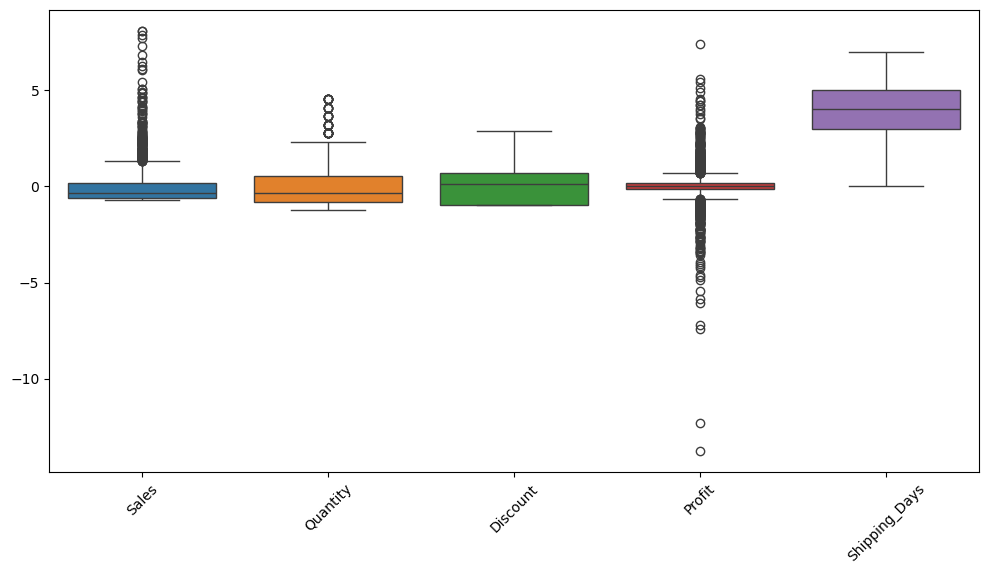

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping_Days']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=45)
plt.show()


In [54]:
print(df.head())
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   datetime64[ns]
 4   Ship Mode      2121 non-null   category      
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   category      
 15  Sub-Category   2121 n

In [57]:
import pandas as pd

# Load dataset with the correct encoding
file_path = "enriched_sales_data_holidays (1).csv" 
df = pd.read_csv(file_path, encoding="ISO-8859-1")  

# Display missing values count per column
print("Missing values per column:\n", df.isnull().sum())

# Fill missing numerical values with the column mean
num_cols = ['Sales', 'Quantity', 'Discount', 'Profit', 'Postal Code']
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Fill missing categorical values with 'Unknown'
cat_cols = ['Customer Name', 'City', 'State', 'Region', 'Product Name', 'is_holiday', 'holiday_name']
for col in cat_cols:
    df[col].fillna('Unknown', inplace=True)

# Confirm there are no missing values
print("Missing values after filling:\n", df.isnull().sum())


Missing values per column:
 Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
is_holiday          0
holiday_name     1963
dtype: int64
Missing values after filling:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
is_holiday       0
holi

C:\Users\tawfe\AppData\Local\Temp\ipykernel_17484\3530246110.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\tawfe\AppData\Local\Temp\ipykernel_17484\3530246110.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

# Outlier Detection & Treatment

In [60]:
import numpy as np

# Define function to detect outliers
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Check for outliers in key numerical features
for col in ['Sales', 'Quantity', 'Discount', 'Profit']:
    outliers = detect_outliers_iqr(df, col)
    print(f"Outliers in {col}: {outliers.shape[0]}")



Outliers in Sales: 164
Outliers in Quantity: 39
Outliers in Discount: 0
Outliers in Profit: 407


In [62]:
# Display some outlier rows for manual inspection
outlier_sales = detect_outliers_iqr(df, 'Sales')
outlier_profit = detect_outliers_iqr(df, 'Profit')

print("Sample Outliers in Sales:")
display(outlier_sales.head())

print("\nSample Outliers in Profit:")
display(outlier_profit.head())


Sample Outliers in Sales:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,is_holiday,holiday_name
4,11,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.184,9,0.2,85.3092,False,Unknown
6,25,CA-2015-106320,2015-09-25,9/30/2015,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.630,3,0.0,240.2649,False,Unknown
7,28,US-2015-150630,2015-09-17,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.430,7,0.5,-1665.0522,False,Unknown
35,150,CA-2016-114489,2016-12-05,12/9/2016,Standard Class,JE-16165,Justin Ellison,Corporate,United States,Franklin,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",1951.840,8,0.0,585.5520,False,Unknown
37,168,CA-2014-139892,2014-09-08,9/12/2014,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,...,FUR-CH-10004287,Furniture,Chairs,SAFCO Arco Folding Chair,1740.060,9,0.3,-24.8580,False,Unknown



Sample Outliers in Profit:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,is_holiday,holiday_name
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,False,Unknown
2,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,False,Unknown
6,25,CA-2015-106320,2015-09-25,9/30/2015,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.2649,False,Unknown
7,28,US-2015-150630,2015-09-17,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522,False,Unknown
9,37,CA-2016-117590,2016-12-08,12/10/2016,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630,False,Unknown


In [64]:
for col in ['Sales', 'Quantity', 'Profit']:
    lower_bound = df[col].quantile(0.05)
    upper_bound = df[col].quantile(0.95)
    df[col] = np.clip(df[col], lower_bound, upper_bound)

In [66]:
for col in ['Sales', 'Quantity', 'Profit']:
    outliers = detect_outliers_iqr(df, col)
    print(f"Remaining Outliers in {col}: {outliers.shape[0]}")


Remaining Outliers in Sales: 164
Remaining Outliers in Quantity: 0
Remaining Outliers in Profit: 407


The remaining outliers are due to real business trends , so we keep them .

# Data visualization

# 1️⃣ Sales & Profit Distribution (Histogram)

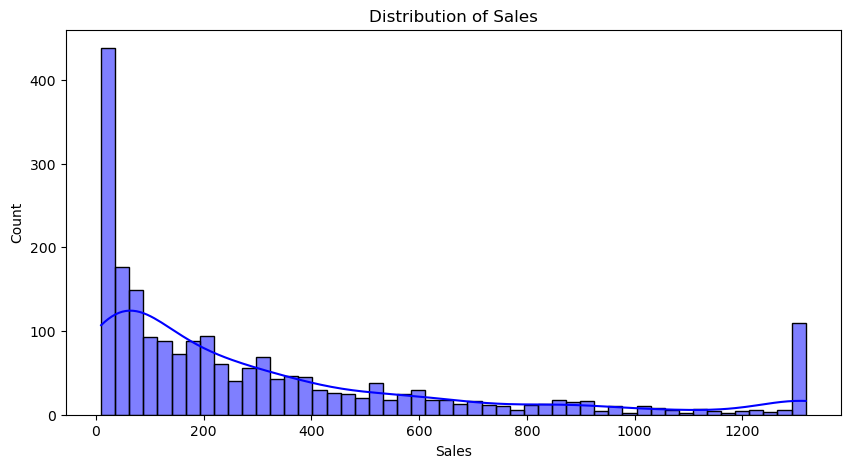

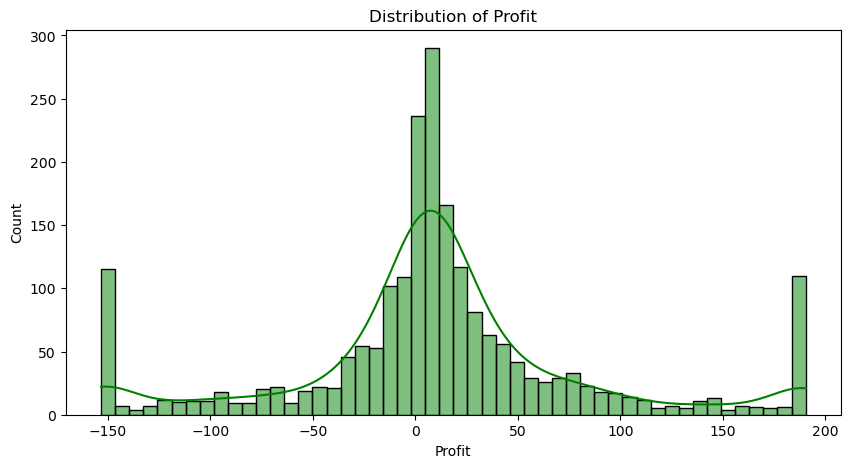

In [73]:
# Histogram for Profit
plt.figure(figsize=(10, 5))
sns.histplot(df['Profit'], bins=50, kde=True, color='green')
plt.title("Distribution of Profit")
plt.xlabel("Profit")
plt.ylabel("Count")
plt.show()



# 2️⃣ Boxplot to Detect Outliers

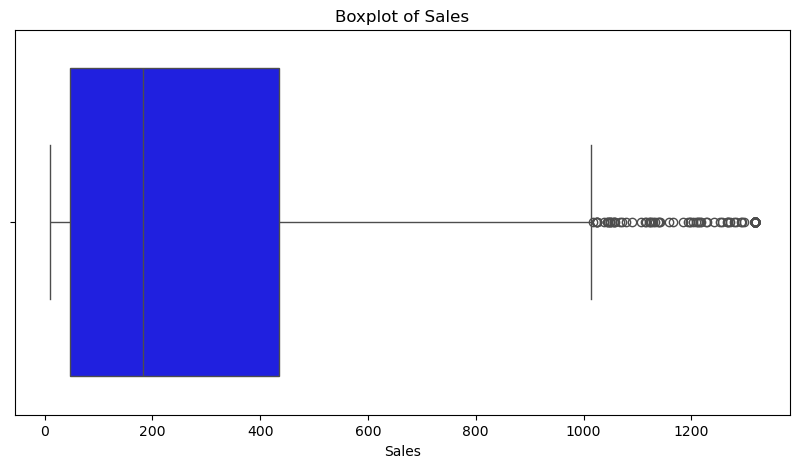

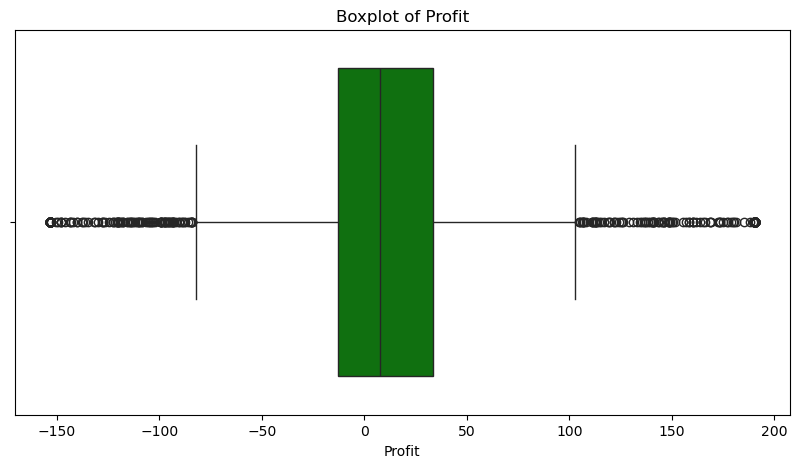

In [78]:
# Boxplot for Sales
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Sales'], color='blue')
plt.title("Boxplot of Sales")
plt.show()

# Boxplot for Profit
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Profit'], color='green')
plt.title("Boxplot of Profit")
plt.show()


# 2️⃣ Sales vs Profit (Scatter Plot)

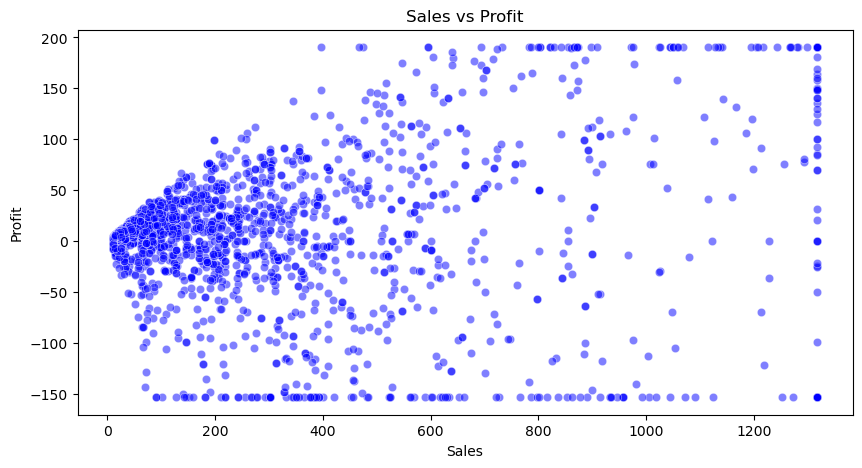

In [83]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Sales'], y=df['Profit'], alpha=0.5, color='blue')
plt.title("Sales vs Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()


# 3️⃣ Missing Values Heatmap

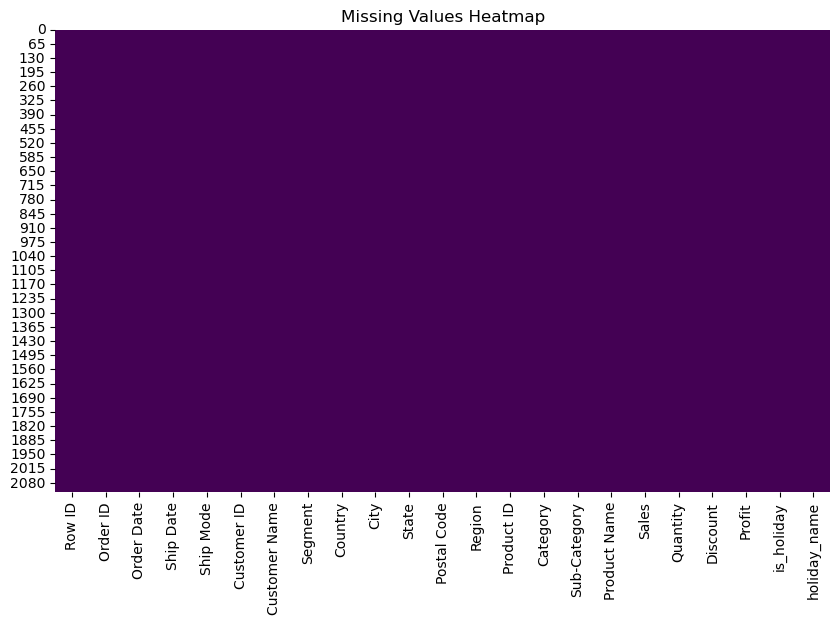

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


# 4️⃣Sales Trend Over Time (Line Chart)

C:\Users\tawfe\AppData\Local\Temp\ipykernel_17484\2340676179.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Sales'].resample('M').sum().plot(figsize=(12, 5), color='purple')


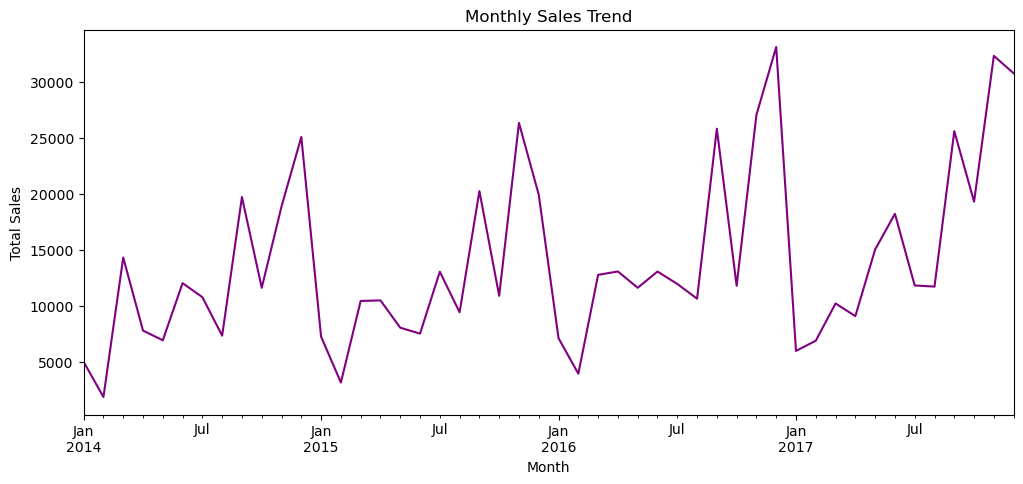

In [90]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)
df['Sales'].resample('M').sum().plot(figsize=(12, 5), color='purple')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


# 5️⃣Data Distribution

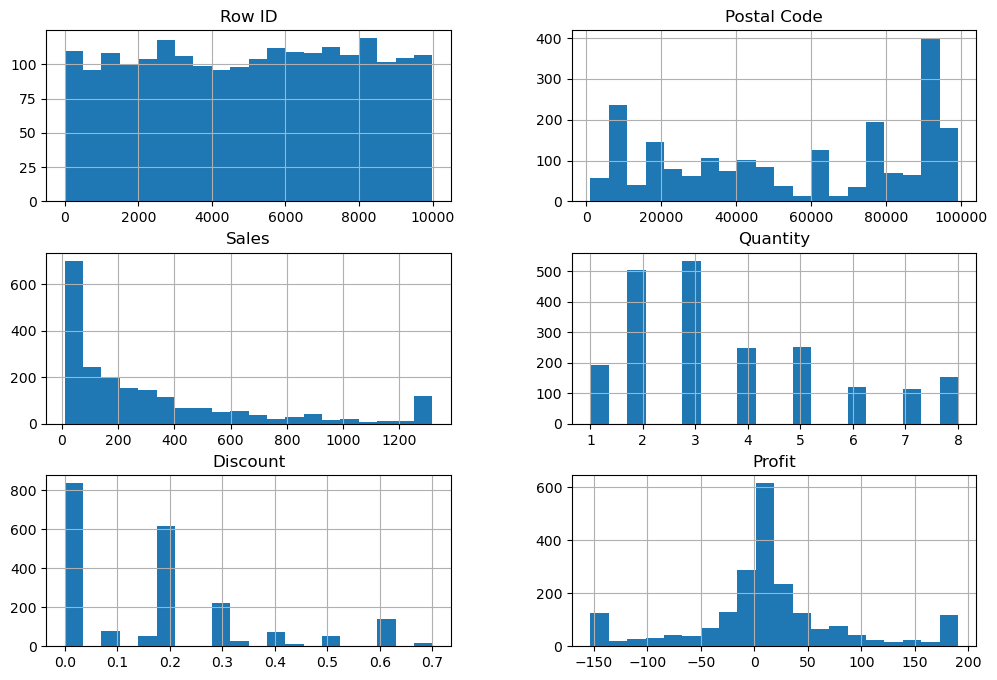

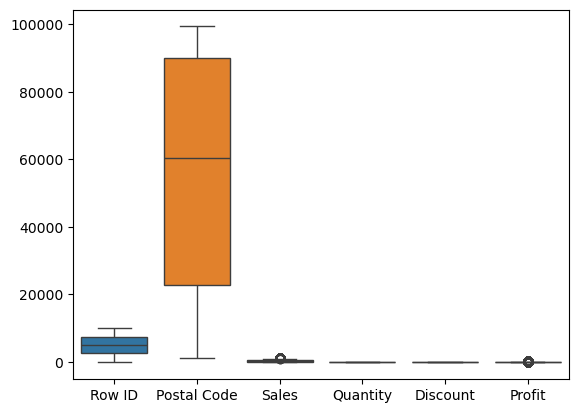

In [92]:
df.hist(figsize=(12, 8), bins=20)
plt.show()

# Boxplots to check for outliers
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.show()

# 6️⃣Category Distribution

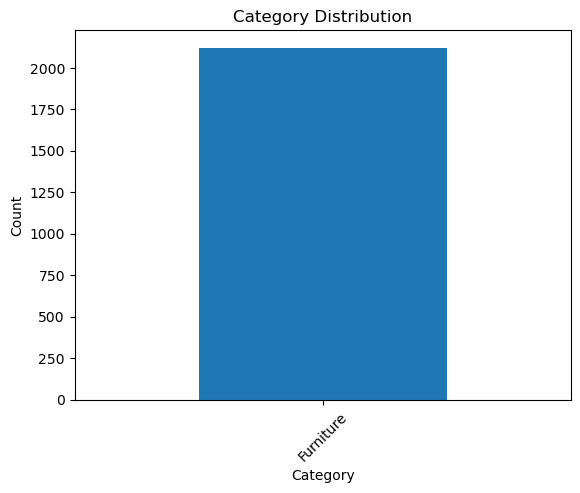

In [94]:
import matplotlib.pyplot as plt

df['Category'].value_counts().plot(kind='bar')
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


# 7️⃣Correlation Heatmap

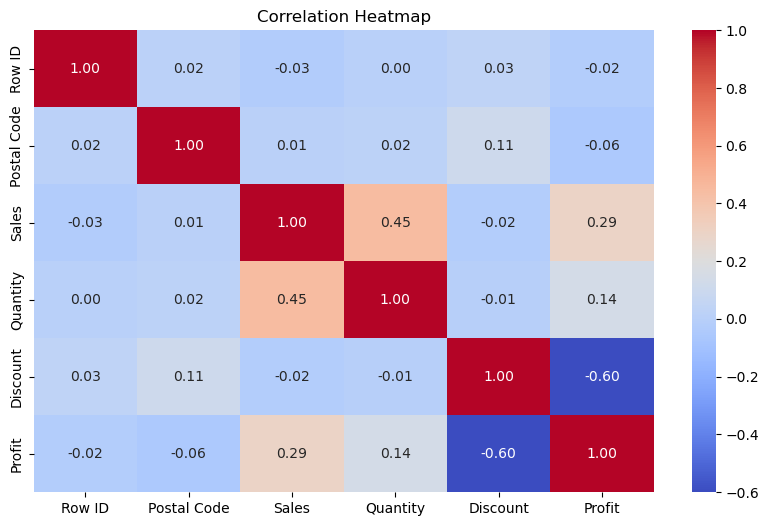

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# 8️⃣sales by sub-category

C:\Users\tawfe\AppData\Local\Temp\ipykernel_17484\2366517590.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sub-Category', y='Sales', data=sub_category_sales, palette='viridis')


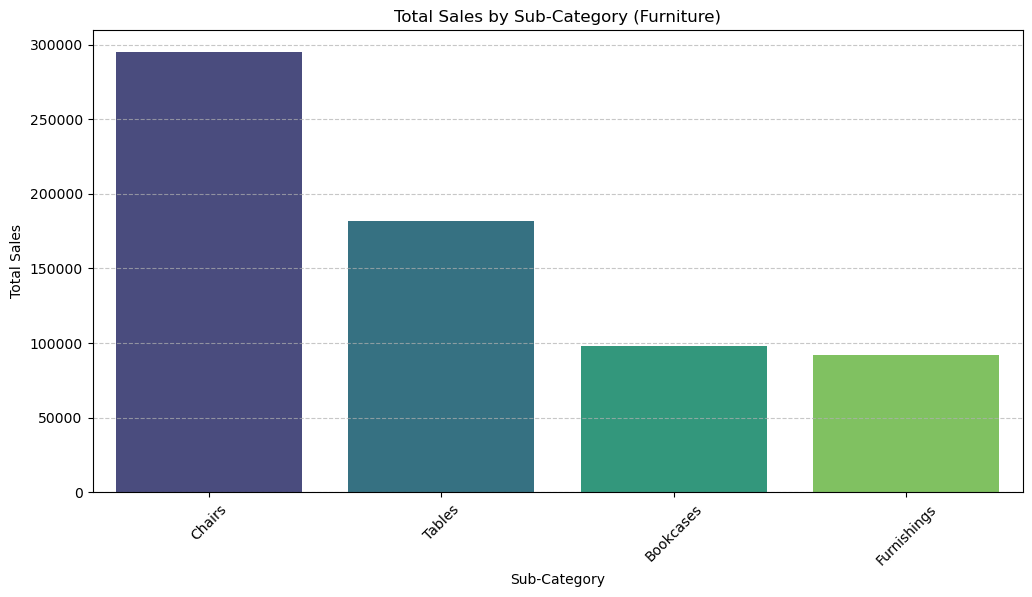

In [111]:
# Aggregate sales by sub-category
sub_category_sales = df.groupby('Sub-Category', as_index=False)['Sales'].sum()

# Sort by sales
sub_category_sales = sub_category_sales.sort_values(by='Sales', ascending=False)

# Plot sales per sub-category
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub-Category', y='Sales', data=sub_category_sales, palette='viridis')
plt.title('Total Sales by Sub-Category (Furniture)')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#  9️⃣sales and profit by sub-category

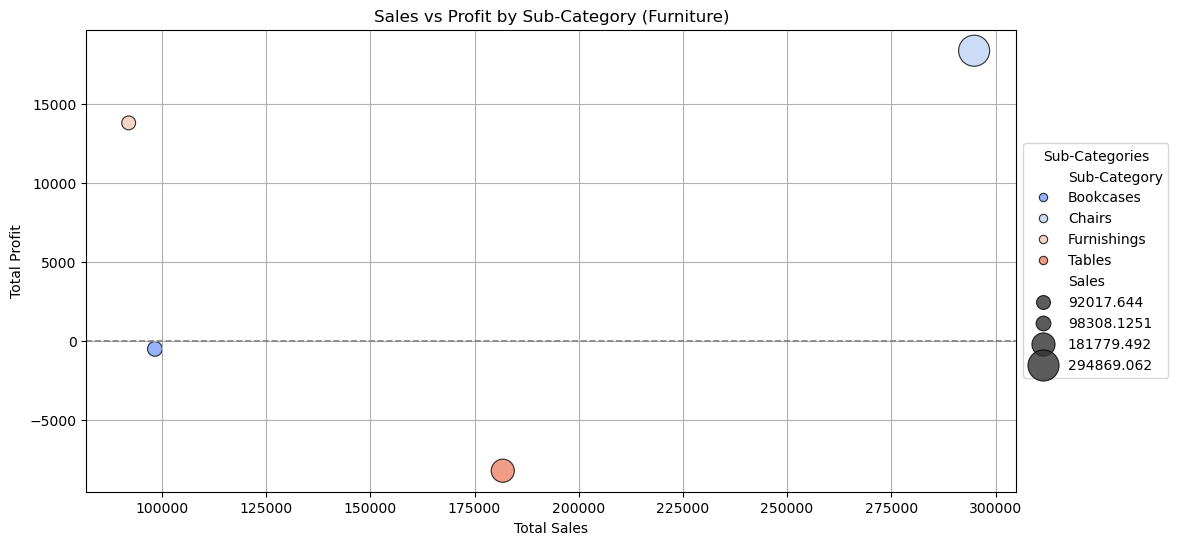

In [123]:
# Aggregate sales and profit by sub-category
sub_category_profit = df.groupby('Sub-Category', as_index=False)[['Sales', 'Profit']].sum()

# Create the scatter plot
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    x='Sales', y='Profit', hue='Sub-Category', size='Sales', 
    sizes=(100, 500), data=sub_category_profit, palette='coolwarm', edgecolor='black', alpha=0.8
)

# Add reference lines at zero profit
plt.axhline(0, color='gray', linestyle='--', linewidth=1.2)

plt.title('Sales vs Profit by Sub-Category (Furniture)')
plt.xlabel('Total Sales')
plt.ylabel('Total Profit')
plt.grid(True)

# Move the legend to the right side
plt.legend(title="Sub-Categories", loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


# 🔟scatter plot for Discount vs Profit with color distinction

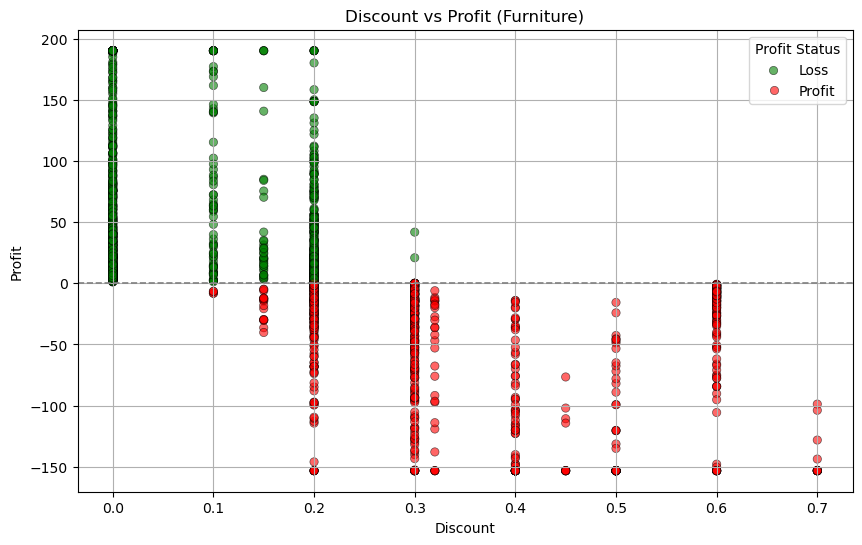

In [129]:
# Create scatter plot for Discount vs Profit with color distinction
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['Discount'], y=df['Profit'], hue=df['Profit'] > 0, palette={True: 'green', False: 'red'},
    alpha=0.6, edgecolor='black'
)

# Add reference line at zero profit
plt.axhline(0, color='gray', linestyle='--', linewidth=1.2)

plt.title('Discount vs Profit (Furniture)')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.legend(title="Profit Status", labels=["Loss", "Profit"])
plt.grid(True)
plt.show()


# 1️⃣1️⃣sales by month based on Ship Date

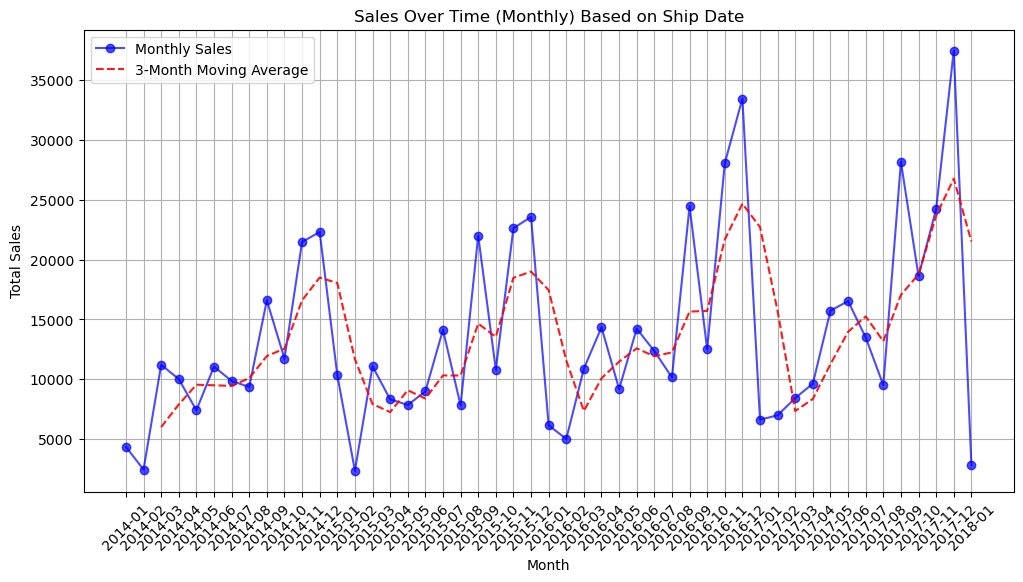

In [149]:
# Convert Ship Date to datetime
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Aggregate sales by month based on Ship Date
df['Month'] = df['Ship Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()

# Plot Monthly Sales Trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales, marker='o', linestyle='-', color='b', alpha=0.7, label='Monthly Sales')

# Add moving average to smooth the trend
rolling_avg = monthly_sales.rolling(window=3).mean()
plt.plot(monthly_sales.index.astype(str), rolling_avg, linestyle='--', color='r', alpha=0.9, label='3-Month Moving Average')

plt.title('Sales Over Time (Monthly) Based on Ship Date')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


# 1️⃣2️⃣sales for holidays vs non-holidays

C:\Users\tawfe\AppData\Local\Temp\ipykernel_17484\2505780882.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_holiday', y='Sales', data=avg_sales, palette='coolwarm')


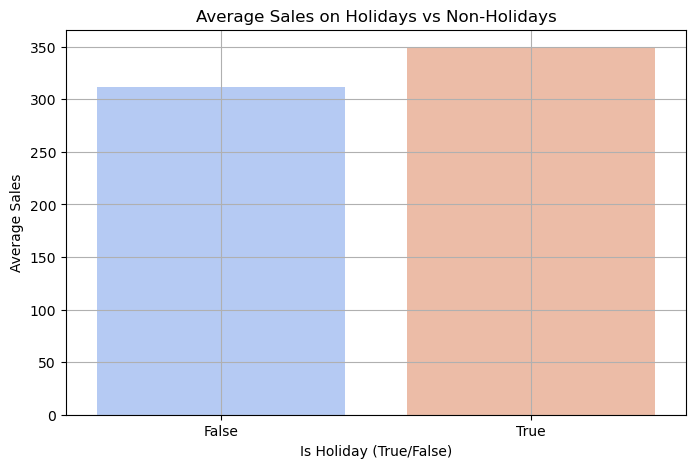

In [163]:
# Compute average sales for holidays vs non-holidays
avg_sales = df.groupby('is_holiday')['Sales'].mean().reset_index()

# Create a bar plot to compare average sales
plt.figure(figsize=(8, 5))
sns.barplot(x='is_holiday', y='Sales', data=avg_sales, palette='coolwarm')

plt.title('Average Sales on Holidays vs Non-Holidays')
plt.xlabel('Is Holiday (True/False)')
plt.ylabel('Average Sales')
plt.grid(True)
plt.show()
